<a href="https://colab.research.google.com/github/johnsigma/meuPortfolio/blob/master/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este é o meu quinto projeto do curso Data Science na Prática do professor Carlos Melo. Este projeto tem como objetivo a construção de um modelo de *Machine Learning* para deteção de possíveis **Churn's** de clientes de uma empresa de telecomunicações.

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

![alt text](https://github.com/johnsigma/meuPortfolio/blob/master/imagens/cancelled.jpg?raw=true)

<a href='https://www.freepik.com/free-photos-vectors/people'>People vector created by freepik - www.freepik.com</a>

### Mas o que é *Churn Prediction*?

O *Churn* é uma métrica que representa o quanto sua empresa perdeu de receitas ou cliente. Você pode ler mais sobre Churn e Churn Rate [aqui](https://resultadosdigitais.com.br/blog/o-que-e-churn/).

O *Churn Prediction* é a previsão de abandono de um determinado serviço por um cliente. Você também pode [clicar aqui](https://tiinside.com.br/20/09/2015/churn-prediction-como-ele-pode-alavancar-seu-negocio/) para ler mais sobre este termo.

A taxa de Churn (ou *Churn Rate*) é muito importante para as empresas pois através dela uma empresa tem noção de quantos clientes ela está perdendo e a partir disto criar soluções e ações para abaixar esta taxa. Junto a isso surgiu a necessidade de agir antes mesmo dos cliente cancelarem, pois o custo de manutenção de um cliente é mais baixo do que o custo de aquisiçõa de um novo cliente.

Mas como as empresas podem direcionar melhor estas ações para não perder clientes? Daí surgiu a necessidade de criar ferramentas para prever se determinado cliente pode vir a cancelar os serviçoes da empresa. Isto é feito levando em conta diversos fatores dos clientes.

Uma das técnicas para prever o cancelamento de seriços por clientes é utilizar algoritmos de *Machine Learning*. E é exatamente o objetivo deste projeto, a partir de uma base de dados de uma empresa de telecomunicações, que contém uma coluna (`Churn`) que diz se um cliente cancelou ou não os serviços desta empresa, aplicamos técnicas de aprendizado de máquina para tentar prever se algum outro cliente pode vir a cancelar ou não seus serviços, e se o algoritmo apontar que o cliente é um possível "cancelador", então a empresa pode direcionar ações para tentar manter este cliente.

## Aquisição dos Dados

Os dados que vamos utilizar neste projeto foram disponibilizados originalmente na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#). O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Não há, no entanto, um dicionário de variáveis explicando cada uma das colunas. Mas através de seus nomes dá pra deduzir o que elas significam.

In [45]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Análise exploratória dos dados

É nessa fase que exploramos nosso *dataset*. Vamos:
 * estudar cada variável (coluna) e suas características
 * verificar a quantidade de valores ausentes e os valores *outliers*
 * identificar a variável alvo
 * ver o balanceamento das classes

Isso é importante para conhecermos melhor nosso conjunto de dados e sua qualidade.

### Relatório do *dataset*

A seguir vou imprimir um pequeno relatório levantado encima do nosso *dataset*. Ele contém o tamanho do nosso *dataset*, nome e tipo das colunas, os valores ausentes e os valores únicos que uma coluna contém (isso é importante para sabermos se algumas variáveis são categóricas ou não).

In [46]:
print(f'Total de entradas do dataset: {df.shape[0]}')
print(f'Total de colunas do dataset: {df.shape[1]}')
print(f'\nNomes da coluna / Tipo da coluna\n\n{df.dtypes}')
print(f'\n\nTotal de dados ausentes: {df.isnull().sum().values.sum()}')
print(f'\nDados ausentes por coluna:\n{(df.isnull().sum()/df.shape[0])}')
print(f'\nValores únicos por coluna:\n{df.nunique()}')

Total de entradas do dataset: 7043
Total de colunas do dataset: 21

Nomes da coluna / Tipo da coluna

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Total de dados ausentes: 0

Dados ausentes por coluna:
customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0

Através dessa pequena análise dos dados percebemos algumas coisas bem interessantes sobre nosso *dataset*. Percebemos que:
 * aparentemente, não temos dados ausentes para tratar
 * a variável `TotalCharges` representa um número decimal que deveria ser `float` mas que na verdade é uma `String`, e devemos fazer a conversão
 * muitas das nossas variáveis tem valores únicos pequenos (2,3 ou 4) e que isso significa que são variáveis categóricas e que devem ser codificadas para valores numéricos
 * a variável alvo está na coluna `Churn`

Vamos tentar agora converter a coluna `TotalCharges` de `String` para `float`:

In [ ]:
# df['TotalCharges'].astype('float64')

Se tentarmos executar o código acima ele irá retornar um erro. O que aconteceu foi que, para o nosso conjunto de dados, os supostos dados ausentes foram representados por alguma String que não representa um número decimal. Então quando tentamos converter essa string em float, o interpretador retorna um erro.

Para corrigir isso e convertermos os valores da coluna para `float`, devemos criar uma função que detecta esses valores ausentes e substituí-os por algum outro valor ou então excluir as entradas que contém esses valores ausentes. 

Como nosso objetivo é contruir um modelo de *Machine Learning* para prever o `Churn` de novas entradas e sabendo que quanto mais entradas nosso modelo tiver mais confiável ele será, então não vamos excluir as entradas com valores ausentes e sim substituir esses valores pela mediana dos valores preenchidos.

In [47]:
# primeiro devemos criar nossa função que tenta converter uma string em um float
# se não for possível converter, então substitui a string por um valor ausente NaN
def converter(string):
  try:
    return float(string)
  except ValueError:
    return np.nan

# agora podemos converter os valores aplicando a função que criamos
df['TotalCharges'] = df['TotalCharges'].apply(converter)

# vamos conferir o tipo de "TotalCharges" agora
print(f"Tipo de dados de 'TotalCharges': {df['TotalCharges'].dtype}")

# vamos verificar os valores ausentes agora que sabemos que eles são do tipo NaN
print(f"Total de dados ausentes de 'TotalCharges' (antes): {df['TotalCharges'].isnull().sum()}")

# agora que convertemos os valores existentes para float e os valores ausentes
# para NaN, podemos substituir os valores ausentes pela mediana dos valores da coluna
mediana = df['TotalCharges'].median()

df['TotalCharges'].fillna(mediana, inplace=True)

Tipo de dados de 'TotalCharges': float64
Total de dados ausentes de 'TotalCharges' (antes): 11


Outra coisa que percebemos na nossa análise é que a coluna `customerID` não acrescenta em nada no nosso *dataset* se nosso objetivo é construir um modelo de *Machine Learning*, então por isso podemos removê-la do nosso *dataframe*.

In [48]:
# removendo a coluna customerID do dataset
df.drop('customerID', axis=1, inplace=True)

# verificando se a coluna foi realmente excluída
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


### Resumo estatístico das variáveis numéricas

Vamos agora utilizar o método `describe` para nos dar um resumo estatístico sobre nossos dados numéricos. Importante ressaltar que a coluna `SeniorCitizen` corresponde a uma variável categórica binária (que assume apenas dois valores, 0 ou 1), ela nos diz se a pessoa que corresponde a entrada é idosa ou não, caso o valor for 1 a pessoa é idosa e se for 0 não idosa.

In [49]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Percebemos que não há indícios de valores *outiliers* nas colunas numéricas. Para termos uma ideia maior se há ou não valores *outiliers* podemos plotar boxplot's das variáveis. Este tipo de gráfico nos ajuda a identificar possíveis valores extremos.

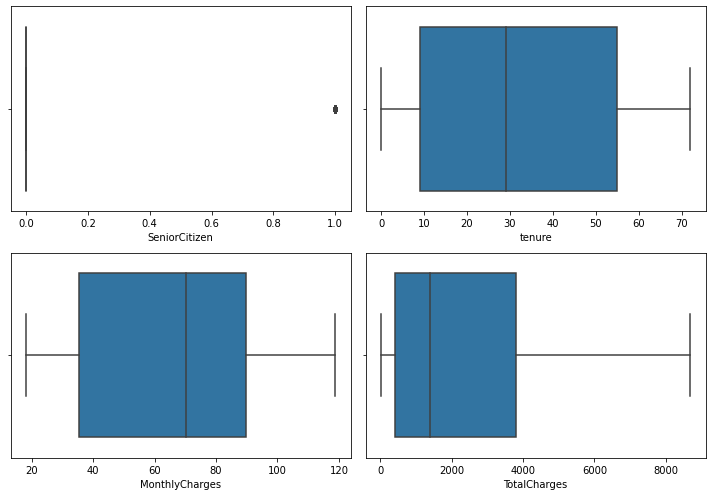

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
sns.boxplot(df['SeniorCitizen'], ax=ax[0][0])
sns.boxplot(df['tenure'], ax=ax[0][1])
sns.boxplot(df['MonthlyCharges'], ax=ax[1][0])
sns.boxplot(df['TotalCharges'], ax=ax[1][1])

plt.tight_layout()

A variável `MonthlyCharges` corresponde ao valor que o cliente paga mensalmente pela assinatura dos seus serviços.

Enquanto a variável `TotalCharges` nos diz o total que um cliente pagou durante todo o tempo que ele assinou algum serviço da empresa. Por exemplo, se temos um cliente que tem uma assinatura mensal de 50 e ele é assinante já faz dois meses, então seu `MonthlyCharges` é 50 e seus `TotalCharges` é 100.

A variável `tenure` corresponde ao tempo que um cliente permanece assinando determinado serviço. Não há a informação nos dizendo qual a unidade de tempo empregada, mas observando o `MonthlyCharges` e o `TotalCharges` de algumas entradas (clientes) e dividindo o segundo pelo primeiro verificamos que o resultado é o `tenure` do cliente. Você mesmo pode verificar isso pegando qualquer cliente do nosso *dataset*, dividir `TotalCharges` por `MonthlyCharges` e comparar o resultado com o `tenure` do determinado cliente.



Os gráficos confirmam que não há *outiliers*. O que é uma preocupação a menos na hora de prepararmos nossos dados para o modelo de *Machine Learning*.

### *Labels* únicos das variáveis

Vamos agora verificar quais os labels das nossas variáveis categóricas. Isso é importante para a etapa de preparação de dados, onde podemos aplicar algumas técnicas de transformação nas nossas variáveis categóricas, transformando elas em variáveis categóricas numéricas, pois assim podemos melhorar o desempenho do nosso modelo de *Machine Learning*.

In [51]:
np.unique(df.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

Como vimos no `array` acima, temos os labels `No`, `No internet service` e `No phone service`. Podemos então assumir que todos esses valores representam uma negativa de serviço e por isso iremos substituir todos esses label por `No`. Pois na prática significam a mesma coisa e fazendo a substituição podemos melhorar o desempenho do nosso modelo.

In [52]:
df_clean = df.replace(['No phone service', 'No internet service'], 'No')

### Verificando o balanceamento das classes

Para concluir essas fase de análise exploratória, vamos verificar o balanceamento das classes da nossa variável alvo (`Churn`). Para isso vamos plotar um gráfico de barras para um melhor entendimento visual.

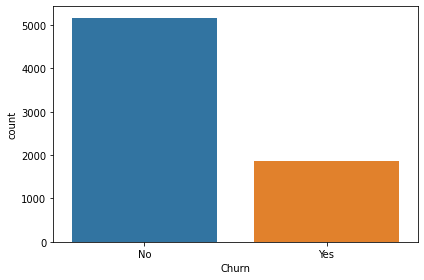

In [53]:
fig, ax = plt.subplots()
sns.countplot(df_clean.Churn, ax=ax)

plt.tight_layout()

É fácil indentificar que a classe `Yes` ocorre com uma frequência bem inferior à classe `No`, na fase de preparação de dados vamos balancear as duas classes para treinar com mais precisão nosso modelo de machine learning.

## Preparação dos Dados

Nesta etapa vamos fazer um pré-processamento dos nossos dados, como balancear nossas classes e substituir os labels categóricos de string para numéricos, afim de construir nosso modelo de machine learning.

As variáveis (ou *features*) que contém 2 labels únicos vão ser processadas usando o `LabelEncoder`, que irá transformar essas variáveis categóricas em numéricas binárias (com os valores 0 ou 1). As outras variáveis categóricas serão processadas utilizando o método `get_dummies`, que divide uma variável categórica em outras variáveis numéricas binárias.

In [54]:
# importar os pacotes necessários
from sklearn.preprocessing import LabelEncoder

In [55]:
# criando um lista com as variáveis binárias e separando as variáveis categóricas
# e numéricas em outras listas
var_binarias = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
var_numericas = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in var_binarias]
var_categoricas = [col for col in df_clean.columns.to_list() if col not in var_binarias + var_numericas]

# copiando o dataframe para outra variável
df_proc = df_clean.copy()

# Label Encoding para as variáveis binárias
le = LabelEncoder()
for n in var_binarias:
  df_proc[n] = le.fit_transform(df_proc[n])

# Get Dummies para as variáveis com mais de 2 labels
df_proc = pd.get_dummies(df_proc, columns=var_categoricas)

# 3 primeiras entradas do daraframe processado
df_proc.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1


Percebam que agora nosso conjunto de dados contém apenas dados numéricos e por causa do método `get_dummies` foram criadas outras colunas binárias.

## Modelo de *Machine Learning*

Finalmente chegamos na hora de implementar nosso modelo, mas essa também é a etapa mais difícil. Primeiro devemos divir nosso conjunto de dados entre dados de treino e teste,depois padronizar nossos dados e balancear nossas classes, vamos utilizar também a técnica de `Cross Validation` para avaliarmos diferentes modelos de machine learning e também testaremos a técnica de `Ensemble` para verificar se ela melhora o desempenho do nosso modelo.

![alt text](https://github.com/johnsigma/meuPortfolio/blob/master/imagens/MachineLearning.jpg?raw=true)

<a href='https://www.freepik.com/free-photos-vectors/technology'>Technology vector created by upklyak - www.freepik.com</a>

In [56]:
# importar os pacotes necessários
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [57]:
# separar nossa matriz do vetor alvo
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']

# dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

Agora vamos balancear nossas classes da variável alvo. Para isso vamos utilizar o `RandomUnderSampler` da biblioteca `imblearn`, vamos utilizá-lo pois ele faz o balanceamento preservando nossa classe minoritária.

Não vamos ainda padronizar nossos dados, para isso vamos criar um *pipeline* que irá fazer isso para cada modelo, esta é uma forma de não enviesar nosso modelo de machine learning.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


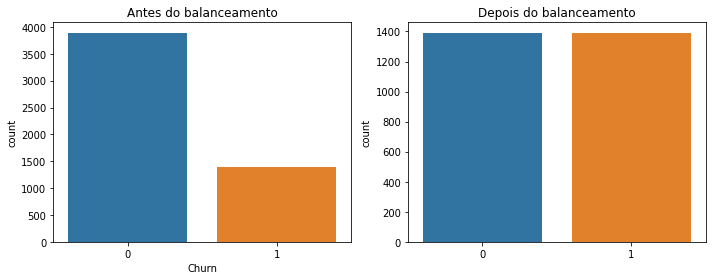

In [58]:
# balancear os dados
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# plotar um gráfico de barras para visualizar a distribuição das classes depois
# de balancear o dataset
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
sns.countplot(y_train, ax=ax[0])
ax[0].set_title('Antes do balanceamento')
sns.countplot(y_rus, ax=ax[1]);
ax[1].set_title('Depois do balanceamento')

plt.tight_layout()

Agora nossas classes estão balanceadas. Note que agora nossa coluna é binária, ou seja, as classes são representada por 0 ou 1, e não mais pelos labels `No` e `Yes`. O que impacta positivamente no nosso modelo de machine learning.

Agora vamos aplicar a validação cruzada em vários modelos de machine learning e vamos escolher aqueles que obtiverem melhor resultado previamente. Importante ressaltar que nesta etapa não vamos mudar os hiperparâmetros dos modelos, isso será feito quando o melhor modelo for selecionado. Os modelos que vamos avaliar são:
* Decision Tree
* Regressão Logística
* XGBoost
* SVC
* SGDC
* Vamos avaliar também o modelo resultante do método de *Ensemble* dos outros modelos utilizando o `VotingClassifier`

Importante ressaltar que vamos avaliar os modelos olhando o `recall` como métrica. Pois nosso modelo visa classificar, em 0 (false) ou 1 (true), nossa variável alvo (`Churn`) e o `recall` nos diz qual a taxa de previsão de positivos nosso modelo prevê corretamente.

In [59]:
# aqui vamos definir uma função onde fazemos a padronização dos dados e
# a validação cruzada de cada modelo passado
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

def validar_modelo(clf, X, y):
  model = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(model, X, y, scoring='recall')

  return scores.mean()

In [60]:
# importar os pacotes necessários
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

# instanciar os modelos
dt = DecisionTreeClassifier()
rl = LogisticRegression()
xgb = XGBClassifier()
svc = SVC()
sgdc = SGDClassifier()
vc = VotingClassifier(estimators=[('dt',dt),('rl',rl),('xgb',xgb),('svc',svc),('sgdc',sgdc)])

# avaliar os modelos
model = []
recall = []

for clf in (dt, rl, xgb, svc, sgdc, vc):
  model.append(clf.__class__.__name__)
  recall.append(validar_modelo(clf, X_rus, y_rus))

# exibir as tabelas com recall, precision e accuracy dos modelos
pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
DecisionTreeClassifier,0.657832
LogisticRegression,0.807333
XGBClassifier,0.815964
SVC,0.803731
SGDClassifier,0.772811
VotingClassifier,0.810211


Pela tabela acima vemos que os melhores modelos foram o XGBoost, a Regressão Logística, o SVC e o método de *ensemble*. Vamos escolher os modelos XGBoost, Regressão Logística e SVC para trabalharmos os hiperparâmetros e tentar melhorar o desempenho dos modelos. 

O próximo passo é fazer um *boosting* nos modelos otimizando os hiperparâmetros. Para isso vamos usar a técnica de ***Grid Search***, que nos dirá qual o melhor valor para determinados parâmetros para melhorar o desempenho do modelo.

### Otimizando os Hiperparâmetros

Vamos agora otimizar os hiperparâmetros para os modelos de Regressão Logística e XGBoost. Para isso vamos utilizar uma técnica chamada *Grid Search*, ela nos diz, através de valores de parâmentros passados, qual o melhor valor para o parâmetro passado para melhorar o desempenho do nosso modelo.

![alt text](https://github.com/johnsigma/meuPortfolio/blob/master/imagens/optimization.jpg?raw=true)

<a href='https://www.freepik.com/free-photos-vectors/website'>Website vector created by stories - www.freepik.com</a>


#### Regressão Logística

Vamos começar pela Regressão Logística, este modelo não têm muitos parâmetros críticos que podemos ajustar para melhorá-lo. Mas de acordo com [este site](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/), os melhores parâmetros e seus valores para passar para o *Grid search* são:
* `solver`
* `penalty`
* `C`

In [64]:
# importando os pacotes necessários
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# instaciando o modelo
model = LogisticRegression()

# padronizar nossos dados de treino
scaler = StandardScaler().fit(X_rus)
X_rus_trans = scaler.transform(X_rus)

# aplicar o Grid Search
parametros = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

kfold = StratifiedKFold(shuffle=True)
clf = GridSearchCV(model, parametros, scoring='recall', n_jobs=-1, cv=kfold)
clf.fit(X_rus_trans, y_rus)

# ver resultados
print(f'Melhor: {clf.best_score_} para {clf.best_params_}')

Melhor: 0.8073644310358166 para {'solver': 'newton-cg'}


In [65]:
# instaciando o modelo
model = LogisticRegression(solver='newton-cg')

# aplicar o Grid Search
parametros = {
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
}

kfold = StratifiedKFold(shuffle=True)
clf = GridSearchCV(model, parametros, scoring='recall', n_jobs=-1, cv=kfold)
clf.fit(X_rus_trans, y_rus)

# ver resultados
print(f'Melhor: {clf.best_score_} para {clf.best_params_}')

Melhor: 0.8080477553441119 para {'penalty': 'none'}


In [68]:
# instaciando o modelo
model = LogisticRegression(solver='newton-cg', penalty='none')

# aplicar o Grid Search
parametros = {
    'C': [100, 10, 1.0, 0.1, 0.01]
}

kfold = StratifiedKFold(shuffle=True)
clf = GridSearchCV(model, parametros, scoring='recall', n_jobs=-1, cv=kfold)
clf.fit(X_rus_trans, y_rus)

# ver resultados
print(f'Melhor: {clf.best_score_} para {clf.best_params_}')

Melhor: 0.8037441014929992 para {'C': 100}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Veja que no "warning" acima, ele nos diz que se definirmos o valor do parâmetro `penalty` como "none" então o parâmetro `C` é ignorado. Então não vamos usar o parâmetro `C` quando instanciarmos nosso modelo.

Vemos que utilizando o *Grid Search* encontramos os melhores valores dos hiperparâmetros para melhorar nosso modelo de Regressão Logística. Vemos que, apesar de ter melhorado, esse melhoramento não foi muito significativo.

#### XGBoost

Vamos agora otimizar os hiperparâmetros do modelo XGBoost e procurar melhorar significativamente seu *recall*, diferente do modelo de Regressão Logística. Para isso vamos utilizar também o *Grid Search*.

O XGBoost possui muitos parâmetros, alguns afetam mais o desempenho do modelo do que outros. Primeiro vamos definir uma taxa de aprendizado pequena e se necessário podemos aumentar depois, em seguida vamos passar um range de estimadores e o *Grid Search* irá nos dizer qual o melhor número de estimadores para nosso modelo. Só depois vamos ajustar outros hiperparâmetros.

In [69]:
# instanciar o modelo
model = XGBClassifier(learning_rate=0.1)

# aplicar o Grid Search
parametros = {
    'n_estimators':range(0,1000,50)
}

kfold = StratifiedKFold(shuffle=True)
clf = GridSearchCV(model, parametros, scoring='recall', n_jobs=-1, cv=kfold)
clf.fit(X_rus_trans, y_rus)

# ver resultados
print(f'Melhor: {clf.best_score_} para {clf.best_params_}')

Melhor: 0.8253242567236534 para {'n_estimators': 50}


Nosso modelo já melhorou em 1% seu desempenho apenas utilizando os estimadores como 50 de parâmetro, e diferente da Regressão Logística, o XGBoost tem vários outro parâmetros que se alterados podem melhorar o desempenho do nosso modelo.

Como vimos acima, nosso modelo teve o melhor desempenho utilizando 50 estimadores, então a partir daqui vamos instanciar nosso modelo de XGBoost com 50 estimadores como padrão.

Vamos agora aplicar o *Grid Search* no parâmetros `max_depth` e `min_child_weight`.

Um pequeno adendo, estou seguindo este **boost** de parâmetros utilizando como guia [este tutorial](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/), na página tem mais detalhes sobre o boosting de parâmetros para o algoritmo XGBoost.

In [70]:
# instanciar o modelo
model = XGBClassifier(learning_rate=0.1, n_estimators=50)

# aplicar o Grid Search
parametros = {
    'max_depth': range(1,10,1),
    'min_child_weight': range(1,6,1)
}

kfold = StratifiedKFold(shuffle=True)
clf = GridSearchCV(model, parametros, scoring='recall', n_jobs=-1, cv=kfold)
clf.fit(X_rus_trans, y_rus)

# ver resultados
print(f'Melhor: {clf.best_score_} para {clf.best_params_}')

Melhor: 0.8389572213197184 para {'max_depth': 1, 'min_child_weight': 1}


Seguindo o tutorial da **Analytics Vidhya** linkado anteriormente, vamos agora ajustar o parâmetro `gamma`.

In [71]:
# instanciar o modelo
model = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

# aplicar o Grid Search
parametros = {
    'gamma': [i/10.0 for i in range(0,5)]
}

kfold = StratifiedKFold(shuffle=True)
clf = GridSearchCV(model, parametros, scoring='recall', n_jobs=-1, cv=kfold)
clf.fit(X_rus_trans, y_rus)

# ver resultados
print(f'Melhor: {clf.best_score_} para {clf.best_params_}')

Melhor: 0.8360898378071736 para {'gamma': 0.0}


A seguir vamos ajustar o `subsample` e o `colsample_bytree`.

In [72]:
# instanciar o modelo
model = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1,
                      gamma=0)

# aplicar o Grid Search
parametros = {
    'subsample': [i/10.0 for i in range(6,10)],
    'colsample_bytree': [i/10.0 for i in range(6,10)]
}

kfold = StratifiedKFold(shuffle=True)
clf = GridSearchCV(model, parametros, scoring='recall', n_jobs=-1, cv=kfold)
clf.fit(X_rus_trans, y_rus)

# ver resultados
print(f'Melhor: {clf.best_score_} para {clf.best_params_}')

Melhor: 0.8411103375364226 para {'colsample_bytree': 0.9, 'subsample': 0.7}


Por último vamos tentar achar uma taxa de aprendizado que melhorar o desempenho do modelo usando os valores dos parâmetros determinados anteriormente.

In [73]:
# instanciar o modelo
model = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0,
                      colsample_bytree=0.9, subsample=0.7)

# aplicar o Grid Search
parametros = {
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.3, 1]
}

kfold = StratifiedKFold(shuffle=True)
clf = GridSearchCV(model, parametros, scoring='recall', n_jobs=-1, cv=kfold)
clf.fit(X_rus_trans, y_rus)

# ver resultados
print(f'Melhor: {clf.best_score_} para {clf.best_params_}')

Melhor: 0.8849771795466852 para {'learning_rate': 0.001}


Esolhendo a menor taxa de aprendizado temos o melhor desempenho do modelo, considerando o `recall` como única métrica.

Nosso modelo melhorou significamente otimizando os parâmetros, essa é uma das razões do porquê o algoritmo CGBoost é tão utilizado.

#### SVC

Vamos agora otimizar os parâmetros para o algoritmo Support Vector Machine Classifier - SVC. Como na Regressão Logística, vamos utilizar [este tutorial](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/) para tunar os parâmetros do modelo.

Primeiro vamos utlizar o *Grid Search* para definir qual o melhor `kernel` a ser utilizado, depois vamos utilizar a mesma técnica para definir o melhor valor para o parâmetro `C`.

In [74]:
# instanciar o modelo
model = SVC()

# aplicar o Grid Search
parametros = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

kfold = StratifiedKFold(shuffle=True)
clf = GridSearchCV(model, parametros, scoring='recall', n_jobs=-1, cv=kfold)
clf.fit(X_rus_trans, y_rus)

# ver resultados
print(f'Melhor: {clf.best_score_} para {clf.best_params_}')

Melhor: 0.8295892318403343 para {'kernel': 'linear'}


In [75]:
# instanciar o modelo
model = SVC(kernel='linear')

# aplicar o Grid Search
parametros = {
    'C': [100, 10, 1.0, 0.1, 0.001]
}

kfold = StratifiedKFold(shuffle=True)
clf = GridSearchCV(model, parametros, scoring='recall', n_jobs=-1, cv=kfold)
clf.fit(X_rus_trans, y_rus)

# ver resultados
print(f'Melhor: {clf.best_score_} para {clf.best_params_}')

Melhor: 0.8734638095974834 para {'C': 0.001}


Percebemos que alterando apenas dois parâmetros conseguimos melhorar bastante o desempenho do nosso modelo.

Agora que já "*tunamos*" nossos modelos, podemos treiná-los encima do nosso *dataset* de treino completo e verificar o desempenho final de cada modelo utilizando os dados de teste. Perceba que só agora no final iremos usar o dataset de teste nos modelos, isso é extremamente importante para não enviesar nosso modelo e treiná-lo para ser ótimo com os dados de teste, mas quando ele se deparar com dados diferentes daqueles treinados seu desempenho é ruim.

### Avaliando os modelos finais

Nesta etapa vamos avaliar os modelos de Regressão Logística, XGBoost, SVC e também nosso modelo de *Ensemble* com os dados de teste e comparar os resultados dos dados de teste com os resultados obtidos com o *Grid Search*. Vamos utilizar esses modelos com os parâmetros definidos na etapa de *Grid Search*.

In [76]:
# importando os pacotes necessários
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [77]:
# instanciando e treinando os modelos

# Regressão Logística
rl = LogisticRegression(solver='newton-cg', penalty='none')
rl.fit(X_rus_trans, y_rus)

# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0,
                      colsample_bytree=0.9, subsample=0.7, learning_rate=0.001)
xgb.fit(X_rus_trans, y_rus)

# SVC
svc = SVC(kernel='linear', C=0.001, )
svc.fit(X_rus_trans, y_rus)

# Método de Ensemble
vc = VotingClassifier(estimators=[('rl',rl),('xgb',xgb),('svc',svc)])
vc.fit(X_rus_trans, y_rus)

# fazer a previsão dos modelos
X_test = scaler.transform(X_test)
y_pred_rl = rl.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_vc = vc.predict(X_test)



# relatório de classificação para cada modelo

print(f'\nRelatório de Classificação para Regressão Logística:\n\n'
      f'{classification_report(y_test, y_pred_rl)}')
print(f'\n\nRelatório de Classificação para XGBoost:\n\n'
      f'{classification_report(y_test, y_pred_xgb, zero_division=1)}')
print(f'\n\nRelatório de Classificação para SVC:\n\n'
      f'{classification_report(y_test, y_pred_svc)}')
print(f'\n\nRelatório de Classificação para Ensemble:\n\n'
      f'{classification_report(y_test, y_pred_vc)}')


Relatório de Classificação para Regressão Logística:

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1283
           1       0.53      0.82      0.64       478

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.73      1761
weighted avg       0.81      0.75      0.77      1761



Relatório de Classificação para XGBoost:

              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1283
           1       0.44      0.89      0.59       478

    accuracy                           0.67      1761
   macro avg       0.69      0.74      0.66      1761
weighted avg       0.80      0.67      0.69      1761



Relatório de Classificação para SVC:

              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1283
           1       0.45      0.88      0.60       478

    accuracy                           0.68

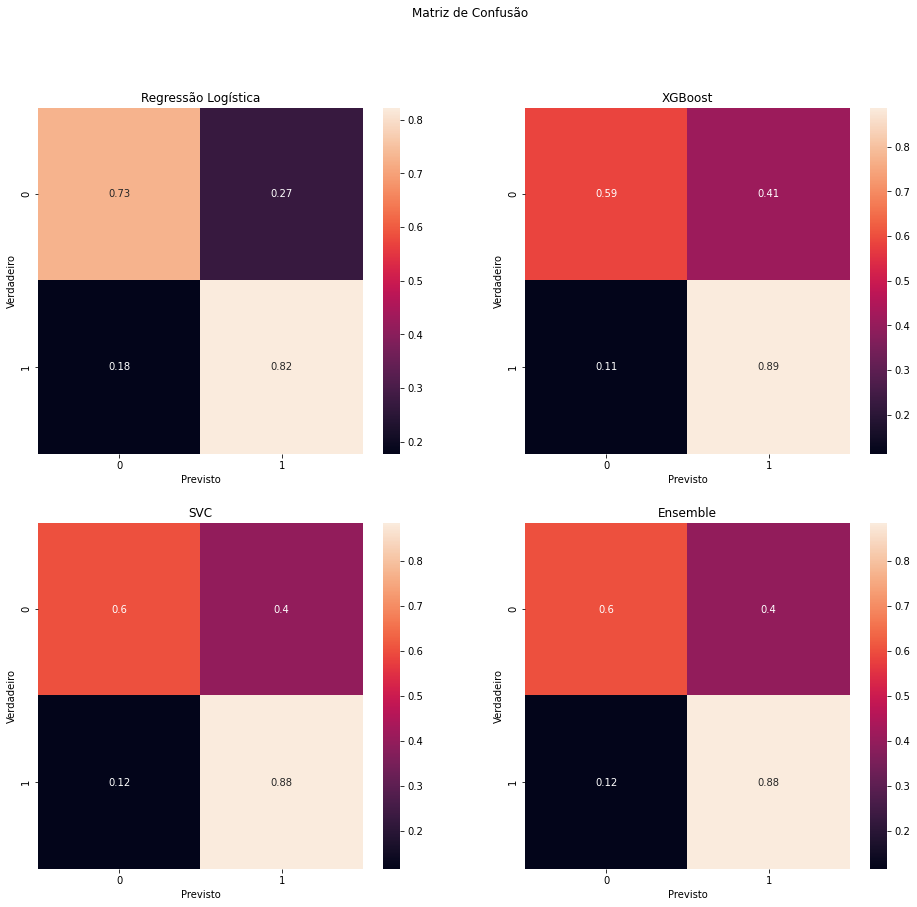

In [78]:
# Plotando as Matrizes de Confusão de cada modelo
fig, ax = plt.subplots(ncols=2, figsize=(16,14), nrows=2)
fig.suptitle('Matriz de Confusão')

sns.heatmap(confusion_matrix(y_test, y_pred_rl, normalize='true'), ax=ax[0][0], annot=True)
ax[0][0].set_title('Regressão Logística')
ax[0][0].set_ylabel('Verdadeiro')
ax[0][0].set_xlabel('Previsto')

sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), ax=ax[0][1], annot=True)
ax[0][1].set_title('XGBoost')
ax[0][1].set_ylabel('Verdadeiro')
ax[0][1].set_xlabel('Previsto')

sns.heatmap(confusion_matrix(y_test, y_pred_svc, normalize='true'), ax=ax[1][0], annot=True)
ax[1][0].set_title('SVC')
ax[1][0].set_ylabel('Verdadeiro')
ax[1][0].set_xlabel('Previsto')

sns.heatmap(confusion_matrix(y_test, y_pred_vc, normalize='true'), ax=ax[1][1], annot=True)
ax[1][1].set_title('Ensemble')
ax[1][1].set_ylabel('Verdadeiro')
ax[1][1].set_xlabel('Previsto')

plt.show()

## Conclusão

Visualizando as matrizes de confusão, percebemos que os modelos mantiveram um desempenho com os dados de teste próximos dos resultados do *Grid Search* que avaliamos anteriormente. Perceba também que nosso Método de Ensemble melhorou significativamente instanciando-o com os modelos instaciados com os hiperparâmetros otimizados.

Lembre-se que a métrica que usamos aqui foi o `Recall`, pois é ele que nos diz a proporção de positivos encontrados corretamente. Veja que algumas outras métricas ficaram com valores baixos, mas como nosso problema é para prever `Churn` (prever se um cliente vai cancelar sua assinatura do serviço) então nossos modelos funcionaram bem, com o melhor modelo sendo o XGBoost.

Chega ao final este artigo, foi um projeto bem cansativo e trabalhoso, mas proporcionalmente recompensador. Se quiserem me acompanhar em outros projetos de Data Science ou desenvolvimento em geral, deixo os links para meu portfolio do GitHub e para o meu perfil do LinkedIn.

A quem leu até aqui, meu muito obrigado e até mais.

[Meu portfolio do Github](https://github.com/johnsigma/meuPortfolio)

[Meu perfil do LinkedIn](www.linkedin.com/in/johncunha42)